## Text Preprocessing
Supose we have textual data available, we need to apply many of pre-processing steps to the data to transform those words into numerical features that work with machine learning algorithms.\
The pre-processing steps for the problem depend mainly on the domain and the problem itself. We don't need to apply all the steps for every problem.\
We'll use NLTK (Natural Language Toolkit) library here.

In [1]:
import nltk
import string
import re

## Text Lowercasing
This is done to reduce the size of the vocabulary of our text data.

In [2]:
def lowercase_text(text):
    return text.lower()

In [3]:
input_str = "Weather is too Cloudy. Possibility of Rain is High, Today!!"
print(lowercase_text(input_str))

weather is too cloudy. possibility of rain is high, today!!


## Remove numbers
We either remove the numbers or convert the numbers into textual representation. We can use regular expressions (re) to remove the numbers

In [4]:
def remove_num(text):
    result = re.sub(r'\d+', '', text)
    return result

In [5]:
input_s = "You bought 6 candies from shop, and 4 candies are in home."
print(remove_num(input_s))

You bought  candies from shop, and  candies are in home.


## Converting numbers to words using the inflect library

In [6]:
!pip install inflect

In [7]:
import inflect
q = inflect.engine()

In [19]:
# convert number into text
def convert_num(text):
    # split strings into list of texts
    temp_string = text.split()
    # initialise empty list
    new_str = []
    for word in temp_string:
        # if text is a digit, convert the digit to numbers and append into the new_str list
        if word.isdigit():
            temp = q.number_to_words(word)
            new_str.append(temp)
        # append the texts as it is
        else:
            new_str.append(word)
    #join the texts of new_str to form a string
    temp_str=' '.join(new_str)
    return temp_str

input_num = "You bought 6 candies from shop, and 4 candies are in home."
print(convert_num(input_num))

You bought six candies from shop, and four candies are in home.


## Remove Punctuation
We remove punctuations so that we don't have different forms of the same word. If we don't remove punctuations, been.,been,been! will all be treated differently.

In [22]:
def rem_punct(text):
    translator=str.maketrans('','',string.punctuation)
    return text.translate(translator)

input_str="Hey, Are you excited??, After a week, we will be in Shimla"
rem_punct(input_str)

'Hey Are you excited After a week we will be in Shimla'

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Remove default stopwords
Stopwords are words that do not contribute to the meaning of the sentence. Hence, they can be safely removed without any change in the meaning of a sentence. The NLTK (Natural Language Toolkit) library has a set of stopwords, which can be used to remove stopwords from our text and return a list of word tokens.

In [24]:
# importing nltk library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/anil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/anil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
# remove stopwords function
def rem_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in string.punctuation]
    filtered_text = [word for word in filtered_text if word not in stop_words]
    return filtered_text

ex_text = "Data is the new oil. A.I is the last invention"
rem_stopwords(ex_text)


['Data', 'new', 'oil', 'A.I', 'last', 'invention']

## Stemming
Stemming is the process of getting the root form of a word. Root or Stem is the part to which inflectional affixes (like -ed, -ize, etc) are added. We would create the stem words by removing the prefix or suffix of a word. So, stemming a word may not result in actual words.

For Example:

Mangoes ---> Mango
Boys ---> Boy
going ---> go

If our sentences are not in tokens, then we need to convert it into tokens. After we convert strings of text into tokens, then we can convert those word tokens into their root form. These are the Porter stemmer, the snowball stemmer, and the Lancaster Stemmer. We usually use the Porter stemmer among them.

In [26]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [27]:
stem1 = PorterStemmer()

In [28]:
def s_words(text):
    word_tokens = word_tokenize(text)
    stems = [stem1.stem(word) for word in word_tokens]
    return stems

In [29]:
text = 'Data is the new revolution in the World, in a day one individual would generate terabytes of data.'
print(s_words(text))

['data', 'is', 'the', 'new', 'revolut', 'in', 'the', 'world', ',', 'in', 'a', 'day', 'one', 'individu', 'would', 'gener', 'terabyt', 'of', 'data', '.']


## Lemmatization
As stemming, lemmatization does the same, but the only difference is that lemmatization ensures that the root word belongs to the language. Because of the use of lemmatization, we will get valid words. In NLTK, we use WordLemmatizer to get the lemmas of words. We also need to provide a context for the lemmatization. So, we added POS (parts-of-speech) as a parameter.

In [30]:
from nltk.stem import wordnet
from nltk.tokenize import word_tokenize

In [31]:
lemma = wordnet.WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/anil/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
def lemmatize_word(text):
    word_tokens = word_tokenize(text)
    lemmas = [lemma.lemmatize(word, pos='v') for word in word_tokens]
    return lemmas

In [33]:
text = 'Data is the new revolution in the World, in a day one individual would generate terabytes of data.'
print(lemmatize_word(text))

['Data', 'be', 'the', 'new', 'revolution', 'in', 'the', 'World', ',', 'in', 'a', 'day', 'one', 'individual', 'would', 'generate', 'terabytes', 'of', 'data', '.']


## Part of Speech (POS) Tagging
The pos (parts of speech) explain how a word is used in a sentence. In the sentence, a word can have different contexts and semantic meanings. The basic natural language processing (NLP) models like bag-of-words (BOW) fail to identify the relationships between words. For that, we use POS tagging to mark a word to its POS tag based on its context in the data. POS is also used to extract relationships between words.

In [34]:
# importing tokenize library
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

# convert text into word_tokens with their tags
def pos_tagg(text):
    word_tokens = word_tokenize(text)
    return pos_tag(word_tokens)

pos_tagg('Are you afraid of something?')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/anil/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Are', 'NNP'),
 ('you', 'PRP'),
 ('afraid', 'IN'),
 ('of', 'IN'),
 ('something', 'NN'),
 ('?', '.')]

In the above example, NNP stands for Proper Noun, PRP for Proper Noun, IN as Preposition. We can get all the details pos tags using the Penn Treebank tagset

In [35]:
# downloading the dataset
nltk.download('tagsets')

#extract information about the tag
nltk.help.upenn_tagset('PRP')

[nltk_data] Downloading package tagsets to /Users/anil/nltk_data...


PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us


[nltk_data]   Unzipping help/tagsets.zip.


## Chunking
Chunking is the process of extracting phrases from unstructured text and giving them more structure. We also call it shallow parsing. We can do chunking on top of POS tagging. It groups words into chunks, mainly for noun phrases. Chunking is done by using regular expressions.

In [38]:
# importing libraries
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# here we define chunking function with text and regular 
# expressions representing grammar as parameter
def chunking(text, grammar):
    word_tokens = word_tokenize(text)

    # label words with POS
    word_pos = pos_tag(word_tokens)

    # create chunk parser using grammar
    chunkParser = nltk.RegexpParser(grammar)

    # test it on the list of word tokens with tagged POS
    tree = chunkParser.parse(word_pos)

    for subtree in tree.subtrees():
        print(subtree)
    # tree.draw()
sentence='the little red parrot is flying in the sky'
grammar="NP: {<DT>?<JJ>*<NN>}"
chunking(sentence,grammar)

(S
  (NP the/DT little/JJ red/JJ parrot/NN)
  is/VBZ
  flying/VBG
  in/IN
  (NP the/DT sky/NN))
(NP the/DT little/JJ red/JJ parrot/NN)
(NP the/DT sky/NN)


In the above example, we defined the grammar by using the regular expression rule. This rule tells you that NP (noun phrase) chunk should be formed whenever the chunker finds the optional determiner (DT) followed by any number of adjectives (JJ) and then a noun (NN). 

Libraries like Spacy and TextBlob are best for chunking

## Named Entity Recognition
It is used to extract information from unstructured text. It is used to classify the entities which are present in the text into categories like a person, organisation, event, places, etc. This will give you detailed knowledge about the text and the relationship between the different entities

In [39]:
# Importing tokenization and chunk
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')

def ner(text):
    # tokenize the text
    word_tokens = word_tokenize(text)
    
    # pos tagging of words
    word_pos = pos_tag(word_tokens)
    
    # tree of word entities
    print(ne_chunk(word_pos))

text = 'Brain Lara scored the highest 400 runs in a test match which played in between WI and England.'
ner(text)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/anil/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /Users/anil/nltk_data...


(S
  (PERSON Brain/NNP)
  (PERSON Lara/NNP)
  scored/VBD
  the/DT
  highest/JJS
  400/CD
  runs/NNS
  in/IN
  a/DT
  test/NN
  match/NN
  which/WDT
  played/VBD
  in/IN
  between/IN
  (ORGANIZATION WI/NNP)
  and/CC
  (GPE England/NNP)
  ./.)


[nltk_data]   Unzipping corpora/words.zip.


## Understanding Regex
As you're a software developer, you have probably encountered regular expressions many times and got confused many times with these daunting sets of characters grouped together like this:

/^\w+([.-]?\w+)*@\w+([.-]?\w+)*(\.[a-zA-Z]{2,3})+$

And you may wonder what this is all about?

Regular Expressions (Regx or RegExp) are very useful in stepping up your algorithm game and this will make you a better problem solver. The structure of Regx can be intimidating at first, but it is very rewarding once you get all the patterns and implement them in your work properly.

## What is Regex and why is it important?
A Regex or we call it as regular expression, is a type of object that will help you extract information from any string data by searching through text and finding what you need. Whether it's punctuation, numbers, letters, or even white spaces, RegEx will allow you to check and match any of the character combinations in strings.

For example, suppose you need to match the format of an email address or security numbers. You can utilize RegEx to check the pattern inside the text strings and use it to replace another substring.

For instance, a RegEx could tell the program to search for specific text from the string and then print out the output accordingly. Expressions can include text matching, repetition of words, branching, and pattern composition.

Python supports RegEx through libraries. In RegEx, it supports various things like Identifiers, Modifiers, and White Space.



| **Identifiers**                   | **Modifiers**                                                    | **White space characters** | **Escape required**       |
|---------------------------------|--------------------------------------------------------------|------------------------|-----------------------|
| `\d` = any number (a digit)     | `\d` represents a digit. Ex: `\d{1,5}` will declare a digit between 1,5 like 424, 444, 545, etc. | `\n` = new line        | `.` `+` `?` `*` `{}` `$` `^` `()` `[]` `|` `\` |
| `\D` = anything but a number (a non-digit) | `+` = matches 1 or more                                      | `\s` = space           |                       |
| `\s` = space (tab, space, newline, etc.) | `?` = matches 0 or 1                                         | `\t` = tab             |                       |
| `\S` = anything but a space     | `*` = 0 or more                                               | `\e` = escape          |                       |
| `\w` = letters (match alphanumeric character, including `_`) | `$` match end of a string                                    | `\r` = carriage return |                       |
| `\W` = anything but letters (matches a non-alphanumeric character excluding `_`) | `^` match start of a string                                  | `\f` = form feed       |                       |
| `.` = anything but letters (periods) | `|` matches either x or y                                     | ---------------------- |                       |
| `\b` = any character except for new line | `[]` = range or "variance"                                   | ---------------------- |                       |
| `\`                             | `{x}` = this amount of preceding element                      |                        |                       |


## RegEx Syntax
  import re
* The re library in Python is used for string searching and manipulation.
* We also use it frequently for web scraping.
**Example for w+ and ^ Expression**
* ^: Here in this expression, matches the start of a string.
* w+: This expression matches for the alphanumeric characters from inside the string.

Here, we will give one example of how you can use w+ and ^ expressions in code. re.findall will cover in the next parts, so just focus on the w+ and ^ expression.

Let's have an example "iNeuron13, Data is a new fuel". If we execute the code, we will get 'iNeuron13' as a result.

In [40]:
import re

sent = "dataset, Data is a new fuel"
r2 = re.findall(r"^\w+", sent)
print(r2)


['dataset']


*Note*: If we remove the + sign from \w, the output will change and it'll give only the first character of the first letter, i.e., [i].

## Example of \s expression in re.split function
* \s: This expression is used for creating a space in the string.
To understand better this expression, we will use the split function in a simple example. In this example, we have to split each word using the re.split function, and at the same time, we have used \s that allows to parse each word in the string separately.

In [42]:
import re
print(re.split(r'\s', 'We splited this sentence'))

['We', 'splited', 'this', 'sentence']


As we can see above, we got the output ['We', 'splited', 'this', 'sentence'], but what if we remove '\' from '\s', it will give a result like removing 's' from the entire sentence. Let's see in the example below:

import re
print(re.split(r's', 'We splited this sentence'))

Similarly, there are series of regular expressions in Python that you can use in various ways like \d, \D, $, \b, etc.

## Use RegEx methods
The "re" packages provide several methods to actually perform queries on an input string. We will see different methods which are:

re.match()
re.search()
re.findall()

**Note**: Based on the RegEx, Python offers two different primitive operations. The match method checks for the match only at the beginning of the string while search checks for a match anywhere in the string.

### Using re.match()
The match function is used to match the RegEx pattern to a string with an optional flag. Here, in this \w+ and \W will match the words starting from "i" and thereafter, anything which is not started with "i" is not identified. For checking match for each element in the list or string, we run the for loop.

In [46]:
import re
lists = ['icecream images', 'i immitated', 'inner peace']
for i in lists:
    q = re.match("(i\w+)\W(i\w+)", i)
    if q:
        print(q.groups())


('icecream', 'images')


## Finding Pattern in the text (re.search())
A RegEx is commonly used to search for a pattern in the text. This method takes a RegEx pattern and a string and searches that pattern within the string.

For using re.search() function, you need to import re first. The search() function takes the "pattern" and "text" to scan from our given string and returns the match object when the pattern is found or else does not match.

In [47]:
import re

pattern = ["playing", "dataset"]
text = "Raju is playing outside."

for p in pattern:
    print("You're looking for '%s' in '%s'" % (p, text), end = ' ')

    if re.search(p, text):
        print('Found match!')
    else:
        print('no match found!')


You're looking for 'playing' in 'Raju is playing outside.' Found match!
You're looking for 'dataset' in 'Raju is playing outside.' no match found!


In the above example, we look for two literal strings "playing", "dataset" and in the text string we had taken "Raju is playing outside.". For "playing" we got the match and in the output we got "Found Match", while for the word "dataset" we didn't get any match. So, we got no match found for that word.

## Using re.findall() for text
We use the re.findall() module when you want to iterate over the lines of the file. It'll list all the matches in one go. Here in an example, we would like to fetch email addresses from the list, and we want to fetch all emails from the list, we use re.findall() method.

In [48]:
import re

kgf = "Abc@gmail.com, XYX@gmail.com, lmn@gmail.com, efg@gmail.com"
emails = re.findall(r'[\w\.-]+@[\w\.-]+', kgf)

for e in emails:
    print(e)


Abc@gmail.com
XYX@gmail.com
lmn@gmail.com
efg@gmail.com


## Text Normalization
In text pre-processing, a highly overlooked step is text normalization. Text normalization means the process of transforming the text into the canonical (or standard) form. Like, "ok" and "k" can be transformed to "okay," its canonical form. Another example is mapping of near identical words such as "preprocessing," "pre-processing," and "pre processing" to just "preprocessing."

Text normalization is very useful for noisy texts such as social media comments, comments on blog posts, and text messages, where abbreviations, misspellings, and the use of out-of-vocabulary (OOV) words are prevalent.

| Raw     | Normalized   |
|---------|--------------|
| 2moro   | tomorrow     |
| 2mrrw   | tomorrow     |
| 2morrow | tomorrow     |
| 2mrw    | tomorrow     |
| tomrw   | tomorrow     |
| b4      | before       |
| otw     | on the way   |
| :)      | smile        |


## Effects of normalization
Text normalization has even been effective for analyzing highly unstructured clinical texts where physicians take notes in non-standard ways. We have also found it useful for topic extraction where near synonyms and spelling differences are common (like 'topic modelling,' 'topic modeling,' 'topic-modeling,' 'topic-modelling').

Unlike stemming and lemmatization, there is not a standard way to normalize texts. It typically depends on the task. For example, the way you would normalize clinical texts would arguably be different from how you normalize text messages.

Some of the common approaches to text normalization include dictionary mappings, statistical machine translation (SMT), and spelling-correction-based approaches.

## TOKENIZERS
### NLTK

In [49]:
!pip install --user -U nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.6 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [50]:
from nltk.tokenize.regexp import WhitespaceTokenizer
m = "There is no need to panic. We need to work together, take small yet important measures to ensure self-protection."

In [52]:
from nltk.tokenize import word_tokenize
text = """Founded in 2002, SpaceX's mission is to enable humans to become a spacefaring civilization and a
multi-planetary species by building a self-sustaining city on Mars. In 2008, SpaceX's Falcon 1 became the
first privately developed liquid-fuel launch vehicle to orbit the Earth."""
word_tokenize(text)

['Founded',
 'in',
 '2002',
 ',',
 'SpaceX',
 "'s",
 'mission',
 'is',
 'to',
 'enable',
 'humans',
 'to',
 'become',
 'a',
 'spacefaring',
 'civilization',
 'and',
 'a',
 'multi-planetary',
 'species',
 'by',
 'building',
 'a',
 'self-sustaining',
 'city',
 'on',
 'Mars',
 '.',
 'In',
 '2008',
 ',',
 'SpaceX',
 "'s",
 'Falcon',
 '1',
 'became',
 'the',
 'first',
 'privately',
 'developed',
 'liquid-fuel',
 'launch',
 'vehicle',
 'to',
 'orbit',
 'the',
 'Earth',
 '.']

Note in the above, we had used a slightly different syntax for importing the module. You'll recognize by now the variable assignment.

In [55]:
tokens=WhitespaceTokenizer().tokenize(m)
print(len(tokens))

19


In [56]:
tokens

['There',
 'is',
 'no',
 'need',
 'to',
 'panic.',
 'We',
 'need',
 'to',
 'work',
 'together,',
 'take',
 'small',
 'yet',
 'important',
 'measures',
 'to',
 'ensure',
 'self-protection.']

In [57]:
my_vocab=set(tokens)
print(len(tokens))

19


In [58]:
my_vocab

{'There',
 'We',
 'ensure',
 'important',
 'is',
 'measures',
 'need',
 'no',
 'panic.',
 'self-protection.',
 'small',
 'take',
 'to',
 'together,',
 'work',
 'yet'}

Now we are going to perform the same operation but with a different tokenizer.


In [63]:
my_st = "There is no need to panic. We need to work together, take small yet important measures to ensure self-protection, the Prime Minister tweeted."

 We'll import a different tokenizer:

In [64]:
from nltk.tokenize.regexp import WordPunctTokenizer

The above tokenizer also splits the words into tokens:

In [65]:
m_t = WordPunctTokenizer().tokenize(my_st)
print(len(m_t))

29


In [66]:
m_t

['There',
 'is',
 'no',
 'need',
 'to',
 'panic',
 '.',
 'We',
 'need',
 'to',
 'work',
 'together',
 ',',
 'take',
 'small',
 'yet',
 'important',
 'measures',
 'to',
 'ensure',
 'self',
 '-',
 'protection',
 ',',
 'the',
 'Prime',
 'Minister',
 'tweeted',
 '.']

What is the difference between the above approaches? In the first one, vocabulary ends up containing "words" and "words." as two distinct words; whereas in the second example "words" is a token type and "." (i.e. the dot) is split into a separate token and this results into a new token type in addition to "words."

In [67]:
from nltk.tokenize import sent_tokenize

text = """Founded in 2002, SpaceX's mission is to enable humans to become a spacefaring civilization 
and a multi-planet species by building a self-sustaining city on Mars. 
In 2008, SpaceX's Falcon 1 became the first privately developed liquid-fuel launch vehicle to orbit the Earth."""

sent_tokenize(text)


["Founded in 2002, SpaceX's mission is to enable humans to become a spacefaring civilization \nand a multi-planet species by building a self-sustaining city on Mars.",
 "In 2008, SpaceX's Falcon 1 became the first privately developed liquid-fuel launch vehicle to orbit the Earth."]

## Frequency Distribution
What is Frequency distribution? This is basically counting words in your texts. To give a brief example of how it works, we use:

In [68]:
# from nltk.book import *
import nltk
# nltk.download('gutenberg')
print("\n\n\n")
text1 = "There is no need to panic. We need to work together, take small yet important measures to ensure self-protection."
freqDist = nltk.FreqDist(word_tokenize(text1))
print(freqDist)





<FreqDist with 18 samples and 22 outcomes>


The class FreqDist works like a dictionary where keys are the words in the text and the values are the counts associated with that word. For example, if you want to see how many words "person" are in the text, you can type as:

In [69]:
print(freqDist["person"])

0


In [71]:
print(freqDist["is"])

1


One of the most important functions in FreqDist is the .keys() function. Let us see what it will give in the below code.

In [72]:
words = freqDist.keys()
print(type(words))

<class 'dict_keys'>


After running the above code, it'll give as class dict_keys, in other words, you get a list of all the words in your text.

And if you want to see how many words are there in the text, you can use:


In [74]:
print(len(words))

18


In the class nltk.text.Text, the function does the same stuff, so what is the difference? The difference is that with FreqDist you can create your own texts without the necessity of converting your text to nltk.text.Text class.

And the other usual function is plot. Plot will display the most used words in your text. So if you want to see the 15 most used words in your text, you would do this:

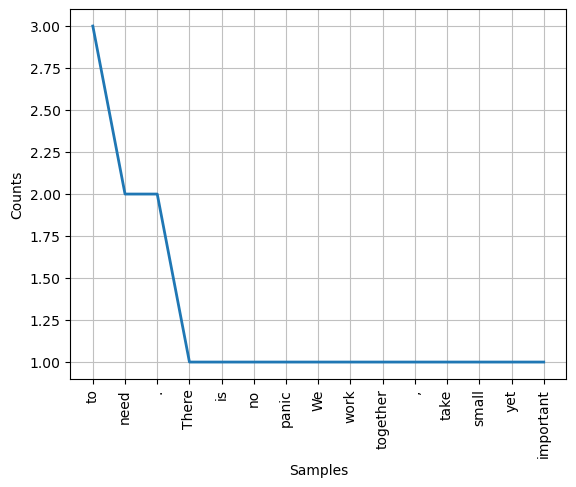

<Axes: xlabel='Samples', ylabel='Counts'>

In [75]:
freqDist.plot(15)